# Decision_tree_ensemble

### 랜덤포레스트에서 트리를 랜덤하게 만드는 두가지 방법
* 데이터를 무작위로 선택하기.
* 분할 테스트에서 특성을 무작위로 선택하기.
* 디시전트리 : 가장 좋은 질문
* 랜덤포레스트 : 질문이 랜덤, 가장 좋은 질문이 아닐 수도 있다.

### - 랜덤 포레스트로 예측시, 먼저 알고리즘이 모델에 있는 모든 트리의 예측을 만들고, 회귀의 경우 이 예측들을 평균하여  최종예측, 분류의 경우 약한 투표 전략을 사용한다. 
### 즉, 각 알고리즘이 가능성 있는 출력 레이블의 확률을 제공함으로서 간접적인 예측을 하며, 트리들이 예측한 확률을 평균내어 가장 높은 확률을 가진 클래스가 예측값이 된다.

### - 부트스트랩 샘플 - 트리를 만들기 위해 각 트리가 고유하게 만들어지도록 무작위한 선택으로 샘플링, 이로인해 특정 데이터 포인트가 누락되거나, 또는 중복될 수도 있지만 랜덤포레스트에서 트리를 생성하기 위한 샘플링 기법으로 사용됨

In [11]:
from matplotlib import font_manager, rc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc("font",family=font_name)
import mglearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y, random_state = 42)

forest = RandomForestClassifier(n_estimators = 7, random_state = 2)
forest.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=7, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

## 랜덤 포레스트 안에서 만들어진 트리는 estimators_속성에 저장된다. 각 트리에서 학습된 결정 경계와, 이를 위합해 만든 결정 경계를 시각화해보겠다.

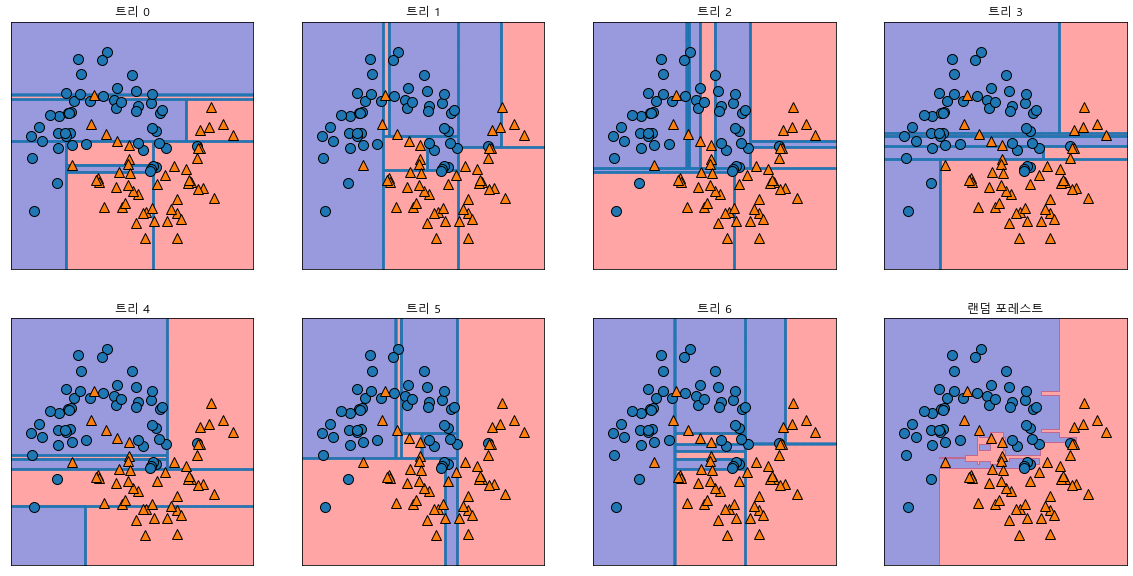

In [12]:
fig, axes = plt.subplots(2,4,figsize = (20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('트리 {}'.format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill = True, ax = axes[-1, -1], alpha = .4)
axes[-1, -1].set_title('랜덤 포레스트')
mglearn.discrete_scatter(X[:,0], X[:,1], y)

* 총 6개의 트리가 만든 결정 경계가 확연히 다르다는 것을 알 수 있으며, 부트스트랩 샘플링으로 한쪽에서 사용된 데이터 포인트가 다른 트리에서는 포함되지 않은 경우가 있어 각트리는 불안정하다.
* 랜덤 포레스트는 개개의 트리보다는 덜 과대적합되고, 훨씬 좋은 결정 경계를 만들어 줄수 있다.

## 유방암 데이터셋에 100개의 트리로 이뤄진 랜덤 포레스트 적용해보기

In [19]:
import mglearn
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state = 0)

forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(X_train, y_train)

print('훈련 세트 정확도 : {:.3f}'.format(forest.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(forest.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972


* 단일 결정 트리에서 한 것처럼, max_features 매개변수를 조정하거나 사전 가지치기를 할수도 있지만
* 기본 설정으로도 좋은 결과를 만들어 줄때가 많다. 
* 결정트리 처럼 랜덤포레스트도 특성 중요도를 제공하는데, 각 트리의 특성 중요도를 취합하여 계산한 것

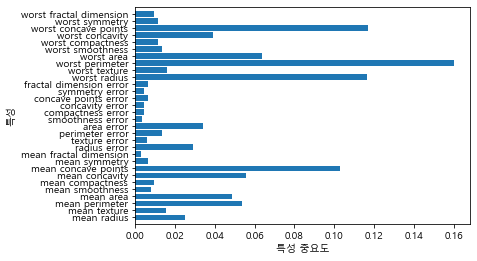

In [23]:
import numpy as np
def plot_feature_importance_cancer(model):
    n_feature = cancer.data.shape[1]
    plt.barh(np.arange(n_feature), model.feature_importances_,align = 'center')
    plt.yticks(np.arange(n_feature), cancer.feature_names)
    plt.xlabel('특성 중요도')
    plt.ylabel('특성')
    plt.ylim(-1, n_feature)
    
plot_feature_importance_cancer(forest)

* 랜덤 포레스트를 만드는 무작위성은 알고리즘이 가능성 있는 많은 경우를 고려할 수 있도록 하므로, 단일 트리보다 더 넓은 시각으로 데이터를 바라본다


## 랜덤포레스트 장점 -
*
*
*
*

## 랜덤 포레스트 단점 -
*
*
*
*

# 그레이 디언트 부스팅 회귀 트리

# 커널 서포트 벡터 머신 

* 분류용 선형 모델에서, 선형 서포트 벡터 머신을 사용해 분류문제를 풀어보았으며, 커널 서포트 벡터머신(SVM)에서는 단순한 초평면으로 정의되지 않는 더 복잡한 모델을 만들 수 있도록 확장한 것이다.

Text(0, 0.5, '특성 1')

C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


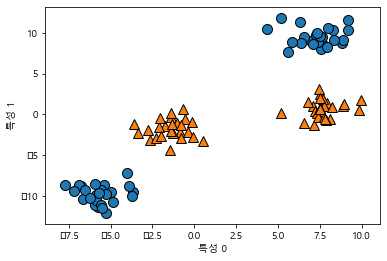

In [27]:
from sklearn.datasets import make_blobs
X,y = make_blobs(centers = 4, random_state = 8)
y = y%2
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

* blobs 데이터셋은 기본적인 선형 서포트 벡터머신으로 나눠지기 애매하고 쉽게 분류되지 않는 특성집단들임에도 불구하고 한번나눠보자

Text(0, 0.5, '특성 1')

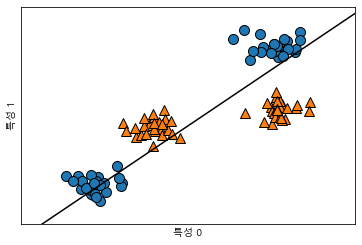

In [28]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

## - 분류가 탐탁치 않다. 따라서 두번 째 특성을 제곱한 새로운 특성을 추가하여 3차원 데이터 포인트로 표현해보자 

C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


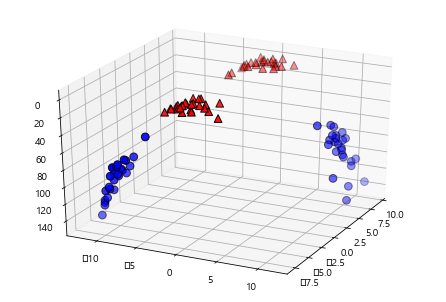

In [35]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
X_new = np.hstack([X, X[:,1:]**2])

figure = plt.figure()
ax = Axes3D(figure, elev =-152, azim =-26)

mask = y== 0

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
          cmap = mglearn.cm2, s = 60, edgecolor = 'k')

ax.scatter(X_new[mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r',marker = '^', cmap = mglearn.cm2, s = 60, edgecolor = 'k')

## 유방암 데이터 셋에 RBF커널  SVM 적용해보기

In [33]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state = 0)
svc =SVC()
svc.fit(X_train, y_train)
print('훈련 세트 정확도 : {:.3f}'.format(svc.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(svc.score(X_test, y_test)))


훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.629


Text(0, 0.5, '특성 크기')

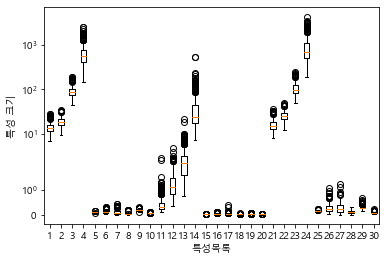

In [36]:
plt.boxplot(X_train)
plt.yscale("symlog")
plt.xlabel("특성목록")
plt.ylabel("특성 크기")

* 위 그래프를 보면 데이터셋의 특성의 자릿수가 완전히 다르고,
* SVM에서는 이러한 특성값들의 크기 또한 영향이 크기때문에 이러한 문제를 해결해봐야한다!!!

## SVM 을 위한 데이터셋 전처리 

In [43]:
#g훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis =0)

#훈련 세트에서 특성별 (최대값 - 최소값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis = 0)

# 훈련데이터에 최솟값을 빼고 범위로 나누면 
# 각 특성에 대해 최솟값은 0 최댓값은 1입니다.
X_train_scaled = (X_train - min_on_training) /range_on_training
print('특성별 최솟값\n', X_train_scaled.min(axis = 0))
print('\n스케일 전 특성별 최솟값:\n', X_train.min(axis = 0))
print('\n\n특성별 최댓값\n', X_train_scaled.max(axis = 0))
print('\n스케일 전 특성별 최댓값:\n', X_train.max(axis = 0))

특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]

스케일 전 특성별 최솟값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.628e-01 7.570e-01 7.228e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]


특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]

스케일 전 특성별 최댓값:
 [2.811e+01 3.381e+01 1.885e+02 2.501e+03 1.447e-01 3.114e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 2.333e-02 1.064e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.903e-01
 6.638e-01 2.075e-01]


In [44]:
X_test_scled = (X_test - min_on_training) / range_on_training

svc = SVC()
svc.fit(X_train_scaled, y_train)

print('훈련 세트 정확도 : {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(svc.score(X_test_scled, y_test)))

훈련 세트 정확도 : 0.948
테스트 세트 정확도 : 0.951


* 특성별 데이터들을 스케일 해주고 커널 서포트 벡터 머신을 사용하면 다양한 데이터셋에서도 잘 사용될 수 있다. 
* 저고 차원이 데이터에서 모두 잘 작동하나, 샘플이  많은 경우는 잘 맞지 않을 수 있다. 
* 데이터 전처리(스케일링)과 매개변수 설정에 주의해주어야 한다 -> 랜덤 포레스트나 그래디언트 부스틩이 사용되는 이유
* 규제 배개변수인 C값이 증가 할수록 모델 복잡도는 올라간다. 
* RBF커널은 가우시안 커널 폭의 역수인 gamma 매개변수를 더 가진다. 

# 신경망 (딥러닝)

## 신경망 모델

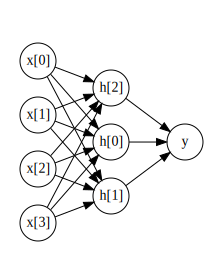

In [47]:
mglearn.plots.plot_single_hidden_layer_graph()

Text(0, 0.5, 'relu(x), tanh(x)')

C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


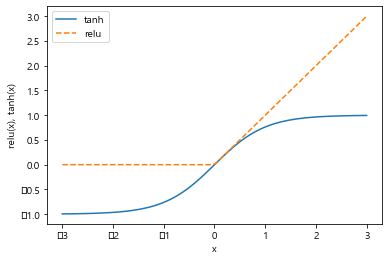

In [50]:
line = np.linspace(-3,3, 100)
plt.plot(line, np.tanh(line), label = "tanh")
plt.plot(line, np.maximum(line, 0), linestyle ='--', label = 'relu')
plt.legend(loc = 'best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

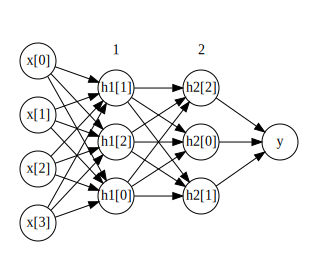

In [51]:
mglearn.plots.plot_two_hidden_layer_graph()

## 신경망 튜닝 - 다중 퍼셉트론(MLP) 구현인 MLPClassfier 적용

* default 히든 레이어 = 100

Text(0, 0.5, ' 특성 1')

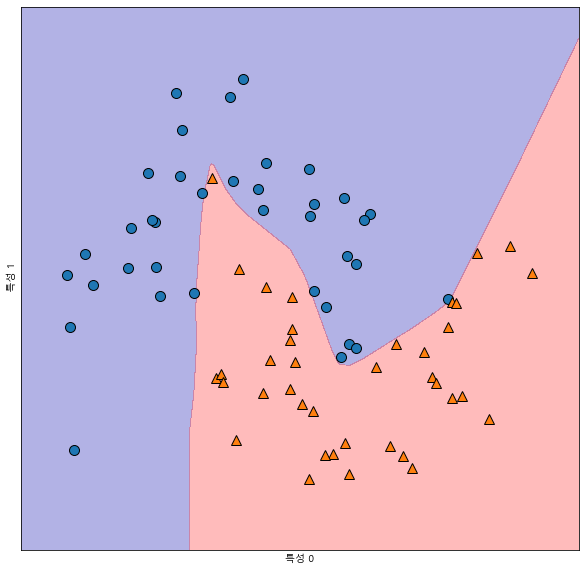

In [56]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100, noise = 0.25, random_state = 3)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, random_state = 42)

mlp = MLPClassifier(solver = 'lbfgs', random_state = 0).fit(X_train, y_train)

plt.subplots(figsize =(10,10))
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("특성 0")
plt.ylabel(" 특성 1")

Text(0, 0.5, ' 특성 1')

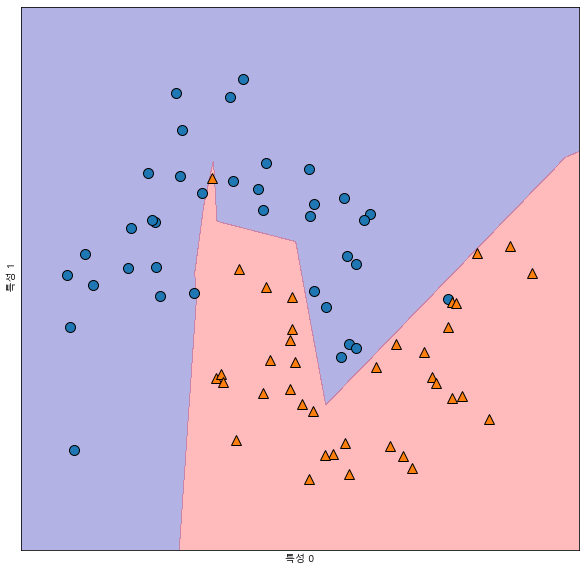

In [65]:
mlp = MLPClassifier(solver = 'lbfgs', random_state = 0, hidden_layer_sizes=[10]).fit(X_train, y_train)

plt.subplots(figsize =(10,10))
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("특성 0")
plt.ylabel(" 특성 1")

Text(0, 0.5, ' 특성 1')

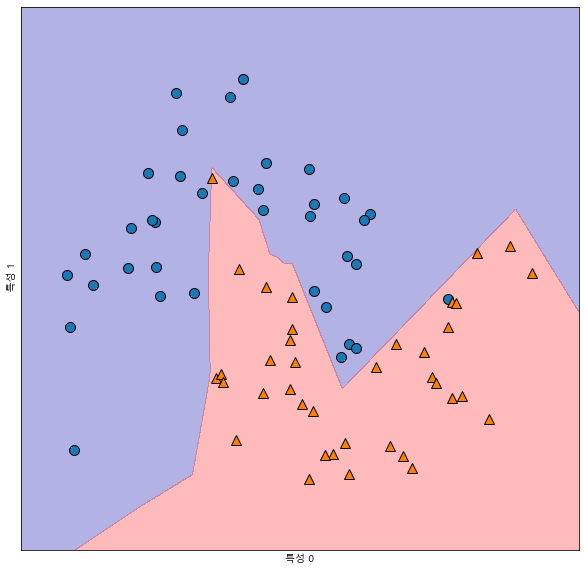

In [67]:
# 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver = 'lbfgs', random_state = 0, hidden_layer_sizes=[10,10]).fit(X_train, y_train)

plt.subplots(figsize =(10,10))
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("특성 0")
plt.ylabel(" 특성 1")